<a href="https://colab.research.google.com/github/deshanahan/DATA-602-Homework/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io

In [3]:
uploaded = files.upload()

Saving multiTimeline.csv to multiTimeline.csv


In [17]:
time_series = pd.read_csv(io.BytesIO(uploaded['multiTimeline.csv']))
time_series.head(3)


,Month,Diet,Gym,Finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47


In [18]:
time_series.describe()

,Diet,Gym,Finance
count,168.000000,168.000000,168.000000
mean,49.642857,34.690476,47.148810
std,8.033080,8.134316,4.972547
min,34.000000,22.000000,38.000000
25%,44.000000,28.000000,44.000000
50%,48.500000,32.500000,46.000000
75%,53.000000,41.000000,50.000000
max,100.000000,58.000000,73.000000


In [20]:
pd.to_datetime(time_series['Month'])
time_series.set_index('Month', inplace = True)
time_series.head()

,Diet,Gym,Finance
Month,,,
2004-01,100,31,48
2004-02,75,26,49
2004-03,67,24,47
2004-04,70,22,48
2004-05,72,22,43


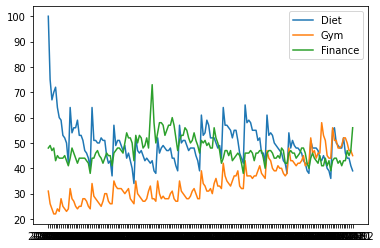

In [35]:
labels = ['Diet', 'Gym', 'Finance']
plt.plot(time_series)
plt.legend(labels)
plt.show()

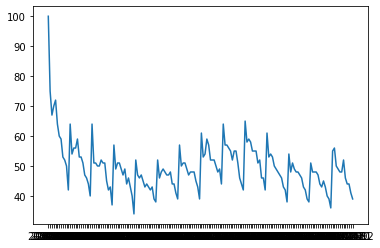

In [36]:
plt.plot(time_series['Diet'])
plt.show()

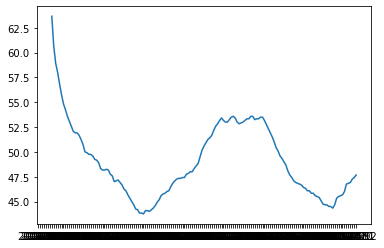

In [40]:
dietrolmean = pd.Series.rolling(time_series['Diet'], window=12).mean()
plt.plot(dietrolmean)
plt.show()


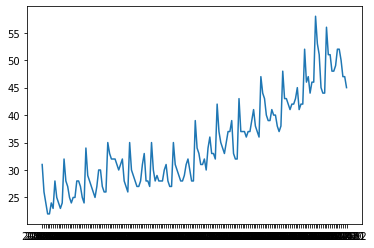

In [46]:
plt.plot(time_series['Gym'])
plt.show()

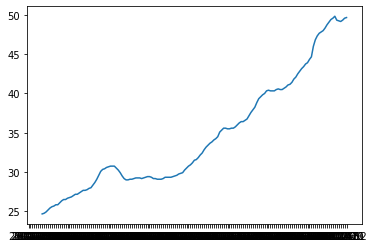

In [42]:
gymrolmean = pd.Series.rolling(time_series['Gym'], window=12).mean()
plt.plot(gymrolmean)
plt.show()

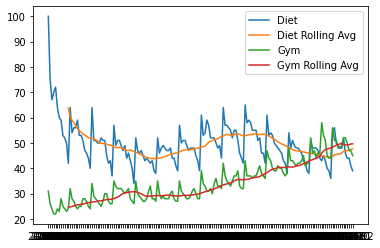

In [47]:
plt.plot(time_series['Diet'])
plt.plot(dietrolmean)
plt.plot(time_series['Gym'])
plt.plot(gymrolmean)
plt.legend(['Diet', 'Diet Rolling Avg', 'Gym', 'Gym Rolling Avg'])
plt.show()

In [51]:
diet_diff = time_series['Diet'] - dietrolmean
diet_diff.dropna(inplace=True)
diet_diff.head()

Month
2004-12   -21.666667
2005-01     3.333333
2005-02    -4.916667
2005-03    -2.000000
2005-04    -0.833333
Name: Diet, dtype: float64

In [50]:
gym_diff = time_series['Gym'] - gymrolmean
gym_diff.dropna(inplace=True)
gym_diff.head()

Month
2004-12   -0.666667
2005-01    7.250000
2005-02    3.083333
2005-03    1.833333
2005-04   -0.416667
Name: Gym, dtype: float64

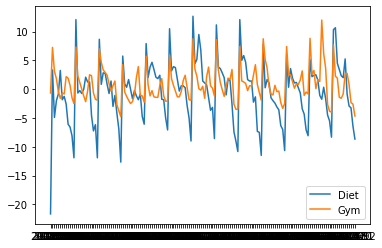

In [56]:
plt.plot(diet_diff)
plt.plot(gym_diff)
plt.legend(['Diet', 'Gym'])
plt.show()

(0.0, 40.0)

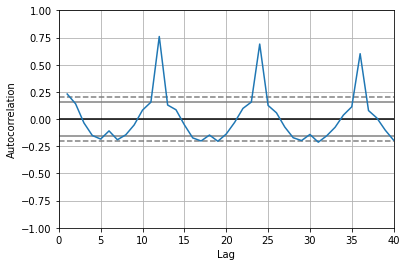

In [61]:
from pandas.plotting import autocorrelation_plot
ax = autocorrelation_plot(diet_diff)
ax.set_xlim([0, 40])

The dotted lines represent the 99% confidence band. Any points above the top line or below the bottom line are statistically significant. Since there is a strong oscillation in the autocorrelation chart about every 12 lags, we can tell there is some seasonality occurring every year.